In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("./Abalone dataset.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Rings count')

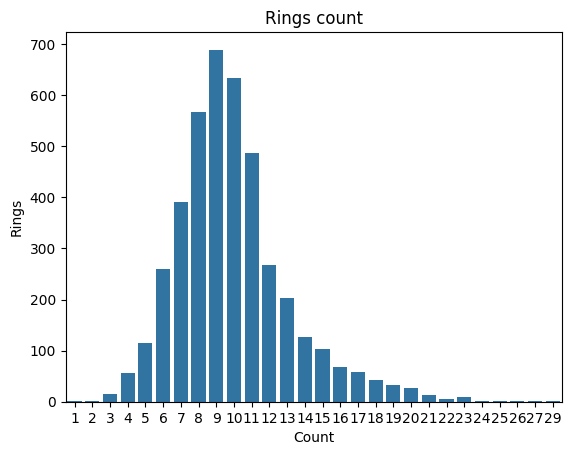

In [6]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Count")
plt.ylabel("Rings")
plt.title("Rings count")

In [9]:
#Rings 분류
df['Rings_Category'] = pd.cut(df['Rings'], bins=[0, 5, 10, 15, 30], labels=[0, 1, 2, 3])
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Rings_Category
id,,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,2
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1


In [26]:
#Rings 제거
X=df.drop(['Rings', 'Rings_Category'],axis=1)
X.head()
#Sex 컬럼 레이블 인코딩
label_encoder = LabelEncoder()
X['Sex'] = label_encoder.fit_transform(X['Sex'])
#Rings_Category 컬럼 레이블 인코딩
y=df['Rings_Category']
y.value_counts()

Rings_Category
1    2541
2    1186
3     261
0     189
Name: count, dtype: int64

In [27]:
Y = pd.get_dummies(y).values

In [28]:
X = X.values

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(learning_rate=0.001),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │            28 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260 (1.02 KB)

 Trainable params: 260 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=8,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
418/418 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - accuracy: 0.5581 - loss: 1.0856 - val_accuracy: 0.5885 - val_loss: 0.9763
Epoch 2/30
418/418 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.6128 - loss: 0.9125 - val_accuracy: 0.6136 - val_loss: 0.8544
Epoch 3/30
418/418 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.6212 - loss: 0.8115 - val_accuracy: 0.6172 - val_loss: 0.8197
Epoch 4/30
418/418 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.6661 - loss: 0.7582 - val_accuracy: 0.6471 - val_loss: 0.7810
Epoch 5/30
418/418 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.6574 - loss: 0.7718 - val_accuracy: 0.6531 - val_loss: 0.7696
Epoch 6/30
418/418 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.6633 - loss: 0.7436 - val_accuracy: 0.6555 - val_loss: 0.7481
Epoch 7/30
418/418 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.6822 - loss: 0.7260 - val_accuracy: 0.6555 - val_loss: 0.7352
Epoch 8/30
418/418 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.6889 - loss: 0.7059 - 

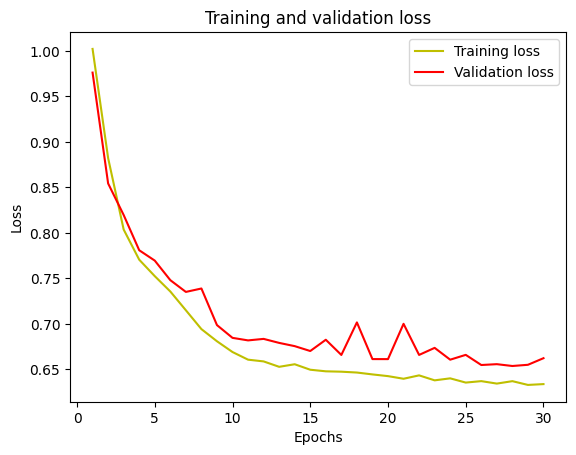

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

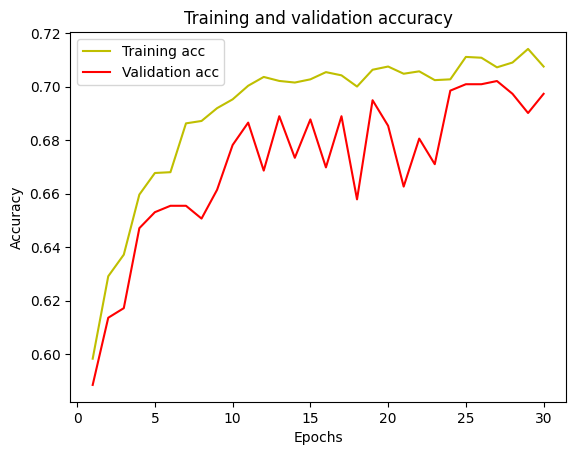

In [42]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.87      0.53      0.66        49
           1       0.74      0.88      0.80       492
           2       0.56      0.47      0.51       244
           3       0.56      0.20      0.29        51

    accuracy                           0.70       836
   macro avg       0.68      0.52      0.57       836
weighted avg       0.68      0.70      0.68       836

[[ 26  23   0   0]
 [  4 432  56   0]
 [  0 121 115   8]
 [  0   7  34  10]]
